<a href="https://colab.research.google.com/github/Allen123321/D-L/blob/master/classification_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


In [2]:
warnings.filterwarnings(action='ignore',category = ConvergenceWarning)


In [3]:
#加载数据
path = "crx.data"
names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']

df = pd.read_csv(path,header=None,names = names)
#df.head()
print('data numbers:',len(df))
#异常处理
df= df.replace("?",np.nan).dropna(how='any')
print('after filter data: ',len(df))
df.head(5)

data numbers: 690
after filter data:  653


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.info()
df.A6.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    object 
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    object 
 14  A15     653 non-null    int64  
 15  A16     653 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.7+ KB


c     133
q      75
w      63
i      55
aa     52
ff     50
k      48
cc     40
m      38
x      36
d      26
e      24
j      10
r       3
Name: A6, dtype: int64

In [7]:
#自定义的一个亚编码实现方式：将v变量转换为一个向量\list集合的形式

def parse(v,l):
  #v是一个字符串，需要进行转换数据
  #l是一个类别信息，v是其中的一个值
  return [1 if i==v else 0 for i in l]


#定义一个处理每条数据的函数
def parseRecord(record):

  result =[]
  ##格式化数据，将离线的数据转换为连续的数据
  a1 = record['A1']
  for i in parse(a1,('a','b')):
    result.append(i)

  result.append(float(record['A2']))
  result.append(float(record['A3']))
  a4 = record['A4']
  for i in parse(a4,('u','y','l','t')):
    result.append(i)

  a5 = record['A5']
  for i in parse(a5,('g','p','gg')):
    result.append(i)
  a6 = record['A6']
  for i in parse(a6,('c','d','cc','i','j','k','r','q','w','x','aa','ff','m','e')):
    result.append(i)
  
  a7 = record['A7']
  for i  in parse(a7,('v','h','bb','j','n','z','dd','ff','o')):
    result.append(i)
  
  result.append(float(record['A8']))
  a9 = record['A9']
  for i  in parse(a9,('t','f')):
    result.append(i)
  
  a10 = record['A10']
  for i  in parse(a10,('t','f')):
    result.append(i)


  result.append(float(record['A11']))

  a12 = record['A12']
  for i  in parse(a12,('t','f')):
    result.append(i)

  a13 = record['A13']
  for i  in parse(a13,('g','p','s')):
    result.append(i)

  result.append(float(record['A14']))
  result.append(float(record['A15']))

  a16 = record['A16']
  if a16 == '+':
    result.append(1)
  else:
    result.append(0)

  return result




In [8]:
### 数据特征处理(将数据转换为数值类型的)
new_names =  ['A1_0', 'A1_1',
              'A2','A3',
              'A4_0','A4_1','A4_2','A4_3',
              'A5_0', 'A5_1', 'A5_2', 
              'A6_0', 'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6', 'A6_7', 'A6_8', 'A6_9', 'A6_10', 'A6_11', 'A6_12', 'A6_13', 
              'A7_0', 'A7_1', 'A7_2', 'A7_3', 'A7_4', 'A7_5', 'A7_6', 'A7_7', 'A7_8', 
              'A8',
              'A9_0', 'A9_1' ,
              'A10_0', 'A10_1',
              'A11',
              'A12_0', 'A12_1',
              'A13_0', 'A13_1', 'A13_2',
              'A14','A15','A16']

datas = df.apply(lambda x: pd.Series(parseRecord(x), index = new_names), axis=1)
names = new_names
datas.head(5)

,A1_0,A1_1,A2,A3,A4_0,A4_1,A4_2,A4_3,A5_0,A5_1,A5_2,A6_0,A6_1,A6_2,A6_3,A6_4,A6_5,A6_6,A6_7,A6_8,A6_9,A6_10,A6_11,A6_12,A6_13,A7_0,A7_1,A7_2,A7_3,A7_4,A7_5,A7_6,A7_7,A7_8,A8,A9_0,A9_1,A10_0,A10_1,A11,A12_0,A12_1,A13_0,A13_1,A13_2,A14,A15,A16
0,0.0,1.0,30.83,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.25,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,202.0,0.0,1.0
1,1.0,0.0,58.67,4.460,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.04,1.0,0.0,1.0,0.0,6.0,0.0,1.0,1.0,0.0,0.0,43.0,560.0,1.0
2,1.0,0.0,24.50,0.500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,280.0,824.0,1.0
3,0.0,1.0,27.83,1.540,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.75,1.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,100.0,3.0,1.0
4,0.0,1.0,20.17,5.625,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.71,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,0.0,1.0


In [9]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1_0    653 non-null    float64
 1   A1_1    653 non-null    float64
 2   A2      653 non-null    float64
 3   A3      653 non-null    float64
 4   A4_0    653 non-null    float64
 5   A4_1    653 non-null    float64
 6   A4_2    653 non-null    float64
 7   A4_3    653 non-null    float64
 8   A5_0    653 non-null    float64
 9   A5_1    653 non-null    float64
 10  A5_2    653 non-null    float64
 11  A6_0    653 non-null    float64
 12  A6_1    653 non-null    float64
 13  A6_2    653 non-null    float64
 14  A6_3    653 non-null    float64
 15  A6_4    653 non-null    float64
 16  A6_5    653 non-null    float64
 17  A6_6    653 non-null    float64
 18  A6_7    653 non-null    float64
 19  A6_8    653 non-null    float64
 20  A6_9    653 non-null    float64
 21  A6_10   653 non-null    float64
 22  A6

In [10]:
##数据分割

X = datas[names[0:-1]]
Y = datas[names[-1]]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [12]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_0,587.0,0.315162,0.464977,0.00,0.000,0.00,1.000,1.00
A1_1,587.0,0.684838,0.464977,0.00,0.000,1.00,1.000,1.00
A2,587.0,31.685417,11.883506,13.75,22.625,28.67,38.290,76.75
A3,587.0,4.909319,5.073588,0.00,1.040,3.00,7.520,28.00
A4_0,587.0,0.761499,0.426530,0.00,1.000,1.00,1.000,1.00
A4_1,587.0,0.235094,0.424419,0.00,0.000,0.00,0.000,1.00
A4_2,587.0,0.003407,0.058321,0.00,0.000,0.00,0.000,1.00
A4_3,587.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
A5_0,587.0,0.761499,0.426530,0.00,1.000,1.00,1.000,1.00
A5_1,587.0,0.235094,0.424419,0.00,0.000,0.00,0.000,1.00


In [21]:
##数据正则化操作
ss = StandardScaler()
X_train = ss.fit_transform(X_train) ## 训练正则化模型，并将训练数据归一化操作
X_test = ss.transform(X_test)  ## 使用训练好的模型对测试数据进行归一化操作




In [22]:
pd.DataFrame(X_train).describe().T

,count,mean,std,min,25%,50%,75%,max
0,587.0,3.442259e-17,1.000853,-0.678380,-0.678380,-0.678380,1.474101,1.474101
1,587.0,-3.442259e-17,1.000853,-1.474101,-1.474101,0.678380,0.678380,0.678380
2,587.0,2.487127e-17,1.000853,-1.510557,-0.763087,-0.253965,0.556251,3.795430
3,587.0,1.078070e-17,1.000853,-0.968448,-0.763290,-0.376646,0.515002,4.555036
4,587.0,5.976669e-17,1.000853,-1.786857,0.559642,0.559642,0.559642,0.559642
5,587.0,8.548906e-17,1.000853,-0.554391,-0.554391,-0.554391,-0.554391,1.803780
6,587.0,2.338183e-17,1.000853,-0.058471,-0.058471,-0.058471,-0.058471,17.102631
7,587.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,587.0,5.976669e-17,1.000853,-1.786857,0.559642,0.559642,0.559642,0.559642
9,587.0,8.548906e-17,1.000853,-0.554391,-0.554391,-0.554391,-0.554391,1.803780


In [23]:

## logistic 算法模型构建
lr = LogisticRegressionCV(Cs=np.logspace(-4,1,50), fit_intercept=True, penalty='l2', solver='lbfgs', tol=0.01, multi_class='ovr')
lr.fit(X_train, Y_train)

LogisticRegressionCV(Cs=array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
       1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
       4.29193426e-03, 5.42867544e-03, 6.86648845e-03, 8.68511374e-03,
       1.09854114e-02, 1.38...
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01]),
                     class_weight=None, cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='ovr', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.01, verbose=0)

Logistic:R value（train accuracy）： 0.889267461669506
Logistic:Sparse feature ratio：2.13%
Logistic: parameters： [[-0.00360566  0.00360566  0.06010294  0.06371679  0.038181   -0.04657456
   0.05970023  0.          0.038181   -0.04657456  0.05970023  0.00424491
  -0.02703857  0.09527565 -0.09250279 -0.01900214 -0.05327403  0.0120337
   0.04677697  0.03154771  0.12295968 -0.02160594 -0.10700193 -0.01117224
   0.03342162 -0.00572481  0.07653215 -0.02175103  0.0248417   0.02830086
  -0.00776041 -0.00740624 -0.09594935 -0.00219562  0.14746233  0.42879631
  -0.42879631  0.15905789 -0.15905789  0.17539052 -0.00924079  0.00924079
   0.01346844 -0.00498746 -0.01266428 -0.0760682   0.11441961]]
Logistic: intercept： [-0.24652859]
Logistic:y predict： [1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.]
Logistic:R value（predict accuracy）： 0.86363636363636

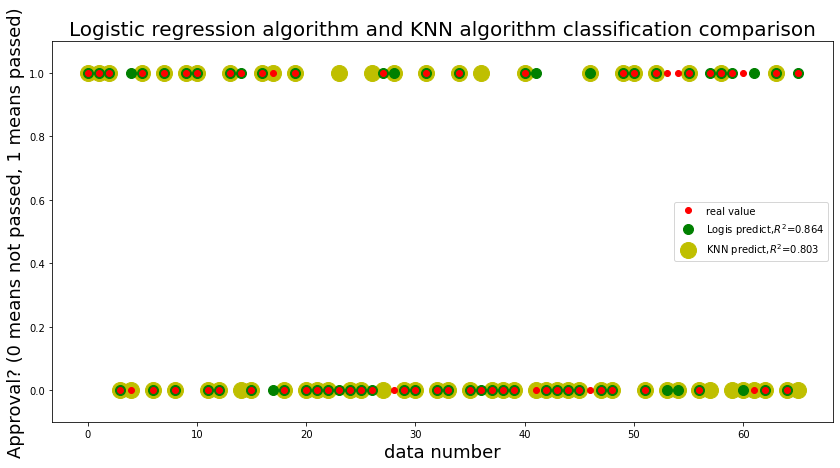

In [25]:
## Logistic算法效果输出
lr_r = lr.score(X_train, Y_train)
print("Logistic:R value（train accuracy）：", lr_r)
print("Logistic:Sparse feature ratio：%.2f%%" % (np.mean(lr.coef_.ravel() == 0) * 100))
print("Logistic: parameters：",lr.coef_)
print("Logistic: intercept：",lr.intercept_)

## Logistic算法预测
lr_y_predict = lr.predict(X_test)
lr_r_test = lr.score(X_test,Y_test)
print("Logistic:y predict：", lr_y_predict)
print("Logistic:R value（predict accuracy）：", lr_r_test)

## KNN算法构建
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree', weights='distance')
knn.fit(X_train, Y_train)

## KNN算法效果输出
knn_r = knn.score(X_train, Y_train)
print("knn:R value（train accuracy）：", knn_r)

## KNN算法预测
knn_y_predict = knn.predict(X_test)
knn_r_test = knn.score(X_test,Y_test)

print("knn:R value（predict accuracy）：", knn_r_test)
## 结果图像展示
## c. 图表展示
x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(-0.1,1.1)
plt.plot(x_len, Y_test, 'ro',markersize = 6, zorder=3, label=u'real value')
plt.plot(x_len, lr_y_predict, 'go', markersize = 10, zorder=2, label=u'Logis predict,$R^2$=%.3f' % lr.score(X_test, Y_test))
plt.plot(x_len, knn_y_predict, 'yo', markersize = 16, zorder=1, label=u'KNN predict,$R^2$=%.3f' % knn.score(X_test, Y_test))
plt.legend(loc = 'center right')
plt.xlabel(u'data number', fontsize=18)
plt.ylabel(u'Approval? (0 means not passed, 1 means passed)', fontsize=18)
plt.title(u'Logistic regression algorithm and KNN algorithm classification comparison', fontsize=20)
plt.show()